<a href="https://colab.research.google.com/github/dipayandas97/EEG-Analysis/blob/master/SVM_RF_on_EEG_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/ISI/"

infile = open('/content/drive/My Drive/ISI/Dataframe.pkl','rb')
orig_data = pickle.load(infile)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
X = np.load(DATA_PATH+'X_data_28x28x1.npy')
Y = orig_data['labels']

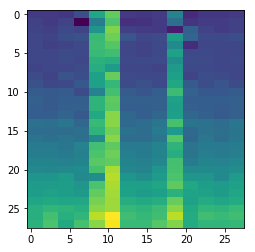

In [0]:
plt.imshow(X[0])

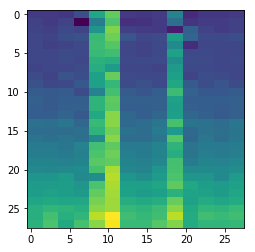

In [0]:
plt.imshow(X__[0].reshape(28,28))

In [0]:
X_ = []
for i in range(397):
  X_.append(X[i].flatten())
  
X_ = np.asarray(X_)

(397, 784)

In [0]:
X__ = []
for i in range(397):
  X__.append(X[i].flatten(order='F'))
  
X__ = np.asarray(X_)
X__.shape

(397, 784)

In [0]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

enc_Y = enc.fit_transform(Y)

In [0]:
enc_Y[0]

4

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
enc_X = sc.fit_transform(X_)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
s_X = sc.fit_transform(X__)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(s_X, enc_Y, test_size = 0.1)

In [0]:
from sklearn import svm, metrics

classifier = svm.SVC(gamma=0.001)

classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         5
           4       0.10      1.00      0.18         1
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7

    accuracy                           0.03        40
   macro avg       0.01      0.10      0.02        40
weighted avg       0.00     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
y_test.shape

(40,)

In [0]:
y_pred

array([4.235, 5.37 , 4.53 , 4.59 , 4.965, 5.04 , 4.98 , 5.05 , 4.58 ,
       4.435, 3.75 , 4.19 , 4.41 , 3.735, 4.275, 3.91 , 4.615, 4.52 ,
       4.405, 3.53 , 4.055, 4.49 , 3.715, 4.555, 4.095, 5.17 , 4.65 ,
       4.905, 4.82 , 4.92 , 4.045, 4.78 , 5.01 , 4.725, 3.885, 4.76 ,
       4.21 , 4.235, 4.65 , 4.35 ])

In [0]:
y_test

array([3, 6, 7, 9, 8, 1, 1, 5, 3, 0, 6, 7, 6, 6, 8, 3, 5, 5, 6, 9, 0, 6,
       8, 3, 8, 0, 7, 9, 5, 5, 6, 3, 6, 9, 9, 9, 4, 7, 0, 9])

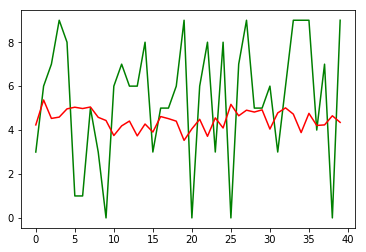

In [0]:
plt.plot(y_test,color='g')
plt.plot(y_pred,color='r')